In [1]:
from fbprophet import Prophet
import pandas as pd

/usr/local/python/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/python/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def read_data():
    df = pd.read_csv('/nfsdata/tmp/prophet-datascience/auto_model_platform/autotrain/data.csv')
    return df

In [7]:
df = read_data()
df.rename(columns={'create_time':'ds', 'view':'y'}, inplace=True)
df_f = df[['ds', 'y', 'coin', 'share', 'like', 'favorite']]
m = Prophet()
m.fit(df_f)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
845,2021-03-16 18:30:03,2.331702e+06,1.410411e+06,3.189630e+06
846,2021-03-17 18:30:03,2.364298e+06,1.518783e+06,3.243061e+06
847,2021-03-18 18:30:03,2.319003e+06,1.413023e+06,3.186505e+06
848,2021-03-19 18:30:03,2.368252e+06,1.437858e+06,3.286353e+06
849,2021-03-20 18:30:03,2.304710e+06,1.429390e+06,3.147270e+06


In [8]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
845,2021-03-16 18:30:03,1.951637e+06,1.410411e+06,3.189630e+06,1.586040e+06,2.322291e+06,380065.462215,380065.462215,380065.462215,376153.126054,376153.126054,376153.126054,3912.336161,3912.336161,3912.336161,0.0,0.0,0.0,2.331702e+06
846,2021-03-17 18:30:03,1.952834e+06,1.518783e+06,3.243061e+06,1.585922e+06,2.324782e+06,411464.297665,411464.297665,411464.297665,376153.126054,376153.126054,376153.126054,35311.171611,35311.171611,35311.171611,0.0,0.0,0.0,2.364298e+06
847,2021-03-18 18:30:03,1.954031e+06,1.413023e+06,3.186505e+06,1.586626e+06,2.327273e+06,364972.546386,364972.546386,364972.546386,376153.126049,376153.126049,376153.126049,-11180.579663,-11180.579663,-11180.579663,0.0,0.0,0.0,2.319003e+06
848,2021-03-19 18:30:03,1.955228e+06,1.437858e+06,3.286353e+06,1.586268e+06,2.329764e+06,413024.503560,413024.503560,413024.503560,376153.126049,376153.126049,376153.126049,36871.377511,36871.377511,36871.377511,0.0,0.0,0.0,2.368252e+06
849,2021-03-20 18:30:03,1.956425e+06,1.429390e+06,3.147270e+06,1.585965e+06,2.332255e+06,348285.947080,348285.947080,348285.947080,376153.126053,376153.126053,376153.126053,-27867.178973,-27867.178973,-27867.178973,0.0,0.0,0.0,2.304710e+06


/usr/local/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


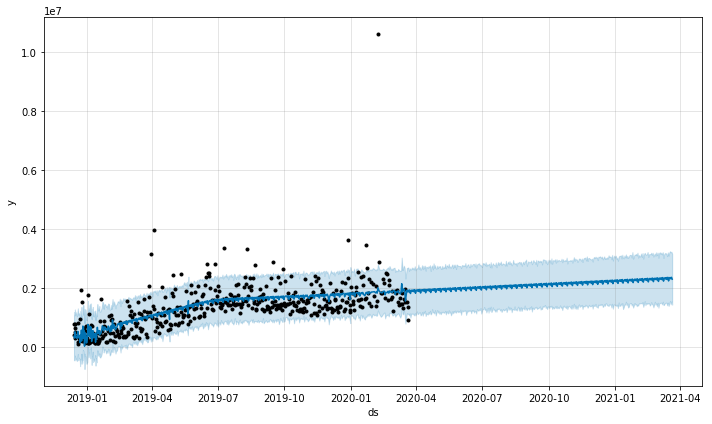

In [4]:
fig1 = m.plot(forecast)

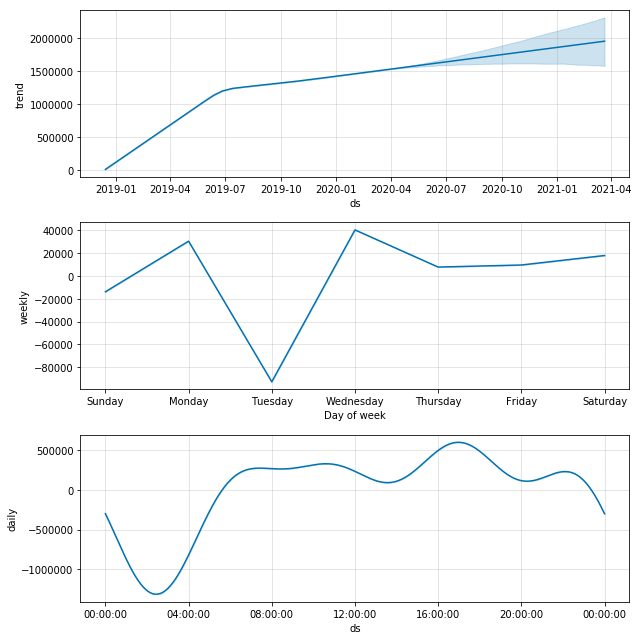

In [5]:
fig2 = m.plot_components(forecast)